#Housing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import linear_model as sklm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
import nltk
from nltk.corpus import names
import random
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random


housing_dat = pd.read_csv('USA_Housing.csv')
#df = pd.read_csv('mushrooms.csv')


housing_dat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
def state_search(state, address):
    
    for ele in state:
        if ele in address: 
            return ele
    return "no state"
def index_search(state, address):
    
    for ele in range(0,len(state)):
        if state[ele] in address: 
            return ele
    return 42069



In [3]:
states_and_territory = pd.read_csv('states.csv')
states_and_territory.sort_values('abrev')
#housing_dat['state'] = housing_dat[state.abrev.isin(housing_dat.Address)]
state_abrev= states_and_territory['abrev']
state_abrev= state_abrev.to_list()

housing_dat['state'] = [state_search(state_abrev,ele) for ele in  housing_dat['Address'] ]
housing_dat['index_state'] = [index_search(state_abrev,ele) for ele in  housing_dat['state'] ]

bystate= housing_dat.sort_values('index_state')
bystate= bystate[bystate.index_state != 42069]
#bystate.drop('no state',axis='columns')
#print(bystate['state'][0:20])
#print(housing_dat[housing_dat['state']=='no state'].shape)

#print(bystate['Avg. Area Income'].unique()[44])
#
bystate.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state,index_state
1286,80939.634573,6.334546,7.647145,3.31,27771.544505,1.499921e+06,"7084 Turner Crossing Suite 917\nNew Mary, AL 1...",AL,0
381,62377.064471,6.289993,7.218400,4.46,39075.956378,1.285400e+06,"7508 Alyssa Mission\nMccartytown, AL 15250-4289",AL,0
1011,73508.359121,6.271705,6.772990,3.49,34894.576334,1.126821e+06,"8580 Caleb Rapid Suite 109\nKarenchester, AL 0...",AL,0
3572,80694.128150,6.569158,6.455327,2.15,46249.625657,1.770372e+06,"24903 Anthony Drives\nLake Suzanneborough, AL ...",AL,0
2788,55470.081861,5.694779,6.810466,2.49,36246.412935,9.625317e+05,"568 Johnston Mountain\nNew Janice, AL 53432-9841",AL,0


In [4]:
def affordable_or_not(salary, price):
    mx_price= 4*salary
    return mx_price>=price

In [5]:
afford= ((bystate['Avg. Area Income']*8) >= bystate['Price'] )

afford = afford.astype(int)
num=0
for ele in afford:
    if ele  : num+=1
print(num)

bystate['afford_or_not']= afford
print(bystate.shape)

59
(4527, 10)


In [6]:
#sns.scatterplot(data=bystate,x='Price',y='Area Population')

In [7]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Bedrooms')

In [8]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Income')

In [9]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area House Age')

In [10]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Rooms')

In [11]:
#sns.regplot(data=bystate,x='Price',y='Avg. Area Income')

In [12]:
#bystate['costal_or_not']= ((bystate['state']=='TX')  | (bystate['state']=='FL')  | (bystate['state']=='PN')  | (bystate['state']=='IL') | (bystate['state']=='NY') | (bystate['state']=='CA'))
#bystate['costal_or_not']= bystate['costal_or_not'].astype(int)


In [13]:
from sklearn.linear_model import LogisticRegression


X = bystate[[ 'Area Population','Price']]
y = bystate.afford_or_not

print(min(bystate['Area Population'])," ",max(bystate['Area Population']))
lm = LogisticRegression()
lm.fit(X, y)

#print(lm.intercept_)
#print(lm.coef_)

172.61068627290044   69592.04023598543


LogisticRegression()

In [14]:
y_pred = lm.predict(X)
# look at what values were predicted


display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [0.00,1.00]'

'precision = [0.98914729 0.83333333]'

'recall = [0.99955237 0.16949153]'

'f-score = [0.99432261 0.28169014]'

In [15]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math

[ 7.81627068e-05 -8.92328439e-06]


Text(0, 0.5, 'Price')

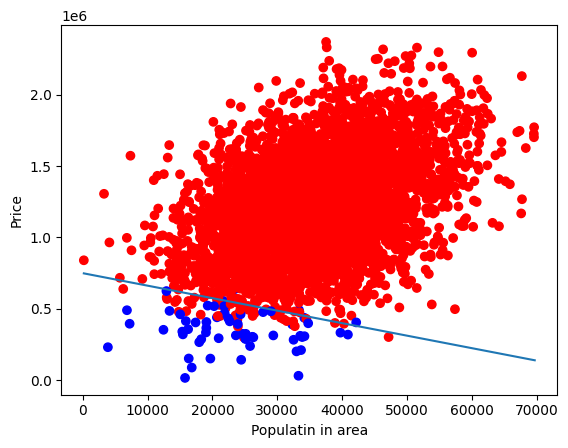

In [16]:

X = bystate[[ 'Area Population','Price']]
y = bystate.afford_or_not

con=750000
b0 = lm.intercept_[0]
b = lm.coef_[0]
print(b)
xdb= [173.23, 69690.5]
ydb = [con+(b0+b[0]*x)/b[1] for x in xdb]
plt.plot(xdb, ydb)



color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(bystate['Area Population'], bystate['Price'], c=color)
plt.xlabel('Populatin in area')
plt.ylabel('Price')



#SVM

In [17]:
clf = svm.SVC(kernel='linear', class_weight={0:1})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


'precision = [0.99687011 0.83333333]'

'recall = [0.99798568 0.76271186]'

'f-score = [0.99742758 0.79646018]'

In [18]:
clf = svm.SVC(kernel='poly',  degree=2)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


'precision = [0.99487294 0.87804878]'

'recall = [0.99888093 0.61016949]'

'f-score = [0.99687291 0.72      ]'

'precision = [0.99598125 0.85416667]'

'recall = [0.9984333  0.69491525]'

'f-score = [0.99720577 0.76635514]'

Text(0, 0.5, 'Price')

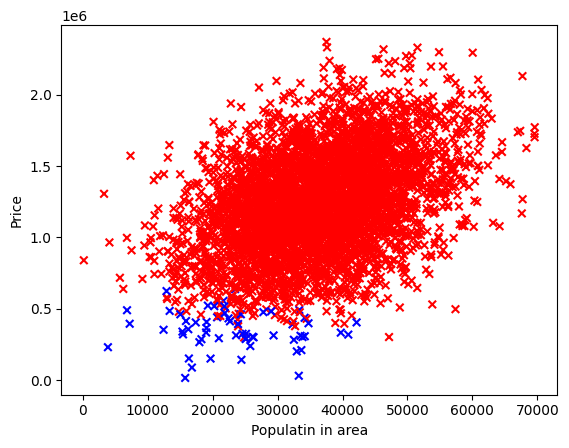

In [19]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


plt.scatter( bystate['Area Population'], bystate['Price'],c=color, s=30, marker='x')
plt.xlabel('Populatin in area')
plt.ylabel('Price')

#Mushroom Data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter('ignore')

In [21]:
mush = pd.read_csv('mushrooms.csv')
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [22]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [23]:
mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [24]:
mush['veil-type'].unique()

array(['p'], dtype=object)

In [25]:
mush['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

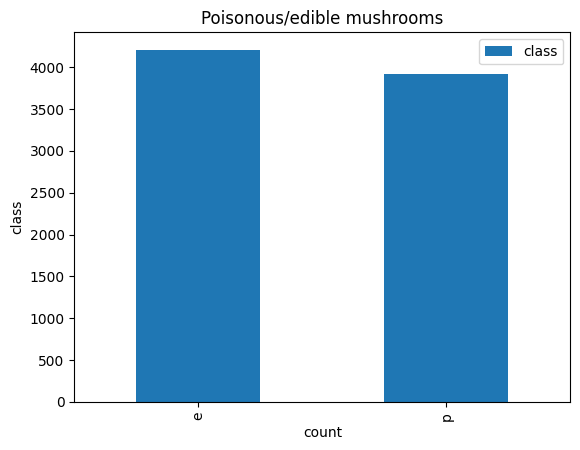

In [26]:
plt.figure()
pd.Series(mush['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel('class')
plt.xlabel('count')
plt.title('Poisonous/edible mushrooms')
plt.legend()

#Data Preprocessing

In [27]:
X=mush.drop('class',axis=1) 
y=mush['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [28]:
label = LabelEncoder() 
for col in X.columns:
    X[col] = label.fit_transform(X[col])
y = label.fit_transform(y)

In [29]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


Dropping this feature, 'veil-type' since its having 0 values and not contributing to the data 


In [30]:
X.drop('veil-type',axis=1,inplace=True)

Dropping highly correlated features having correlation > 0.8

In [31]:
corr = X.corr().abs()

In [32]:
# Find highly correlated features
threshold = 0.8

feats = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col = corr.columns[i]
            feats.add(col)

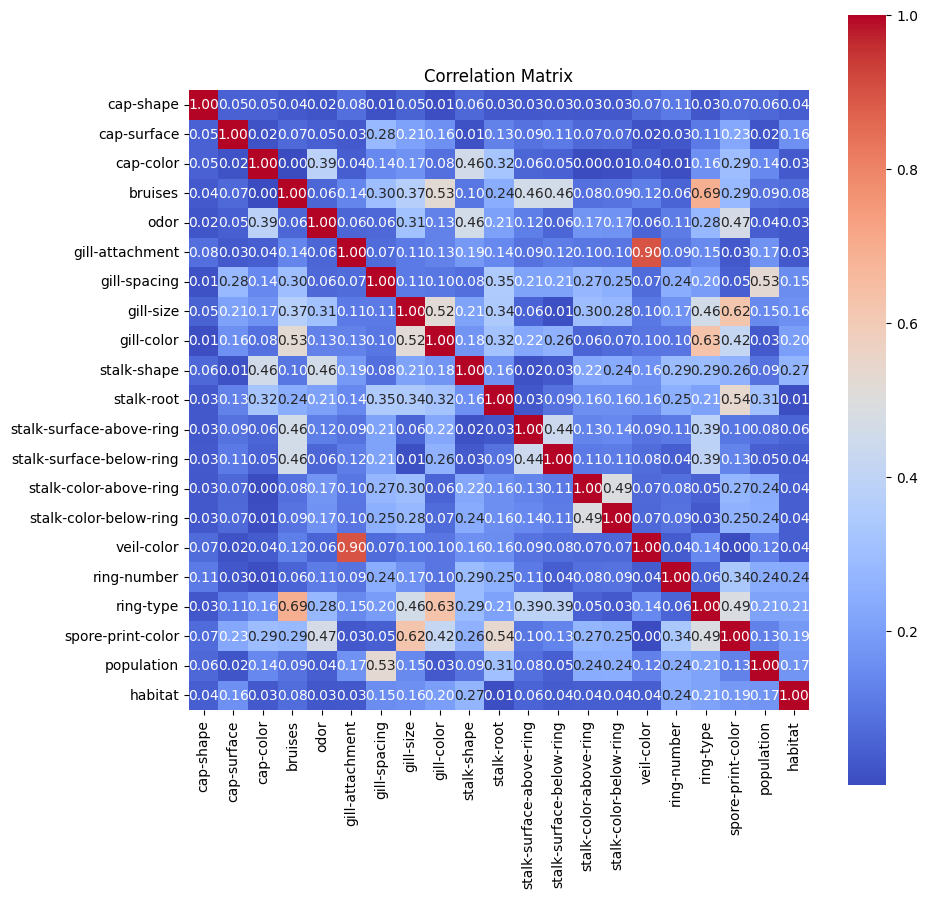

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [34]:
feats

{'veil-color'}

In [35]:
X.drop(feats, axis=1, inplace=True)

In [36]:
one_hot = pd.get_dummies(X,columns=X.columns)
one_hot

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Splitting the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(one_hot,y,test_size=0.25, random_state=42)

Standardization

In [38]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [39]:
pca = PCA(n_components = 10)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

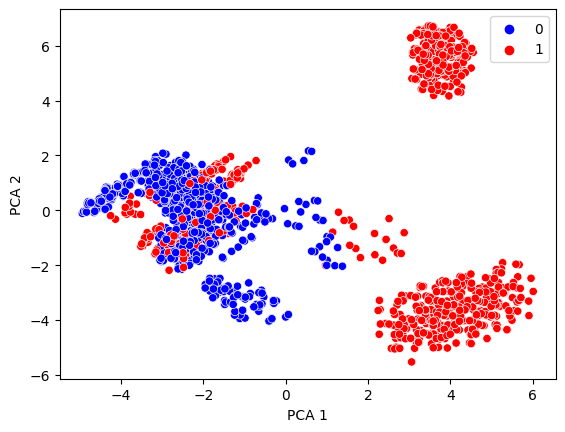

In [57]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['blue', 'red'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#Logistic Regression

In [40]:
lm = LogisticRegression()
lm.fit(X_train,y_train)


LogisticRegression()

In [41]:
y_pred = lm.predict(X_test)

display(accuracy_score(y_test,y_pred))
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9630723781388478

'predicted range: [0.00,1.00]'

'precision = [0.96438884 0.96169355]'

'recall = [0.96346154 0.96266398]'

'f-score = [0.96392496 0.96217852]'

<Axes: >

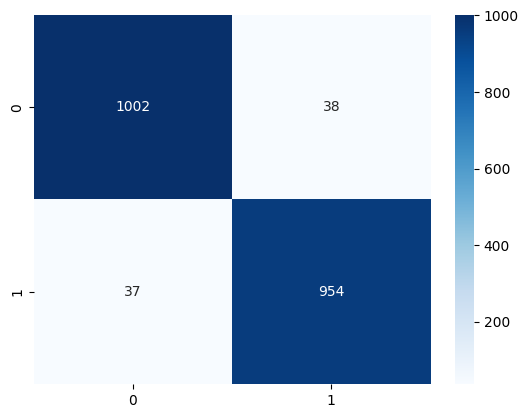

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

#Using gridSearch

In [43]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': ['balanced', {0: 1, 1: 10}, {0: 1, 1: 100}]
}


In [44]:
lm1 = LogisticRegression(random_state=42)

grid = GridSearchCV(lm1, param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', {0: 1, 1: 10},
                                          {0: 1, 1: 100}],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [45]:
print('best parameters:', grid.best_params_)
print('accuracy:', grid.score(X_test, y_test))

best parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
accuracy: 0.9625800098473658


#With weights

In [46]:
lm2 = LogisticRegression(class_weight={0:0.17, 1:0.83})
lm2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.17, 1: 0.83})

In [47]:
y_pred = lm2.predict(X_test)

display(accuracy_score(y_test,y_pred))
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9522402757262433

'predicted range: [0.00,1.00]'

'precision = [0.99268548 0.91620112]'

'recall = [0.91346154 0.99293643]'

'f-score = [0.95142714 0.95302663]'

<Axes: >

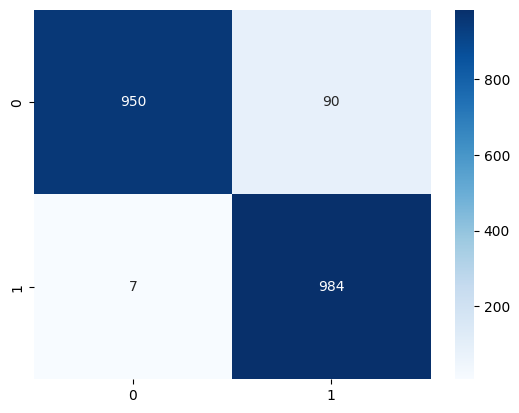

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Trying with different weights

In [49]:
weights = []

for i in range(1, 10):
    a1 = i/10
    a2 = 1 - i/10
    a = (a1, a2)
    weights.append(a)

In [50]:
for w in weights:
    lm3 = LogisticRegression(class_weight={0: w[0], 1: w[1]}, random_state=42)
    lm3.fit(X_train, y_train)
    y_pred = lm3.predict(X_test)
    display(w)
    display(accuracy_score(y_test,y_pred))

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    display('precision = {}'.format(p))
    display('recall = {}'.format(r))
    display('f-score = {}'.format(f))


(0.1, 0.9)

0.9433776464795667

'precision = [1.        0.8960217]'

'recall = [0.88942308 1.        ]'

'f-score = [0.94147583 0.94515975]'

(0.2, 0.8)

0.9547021171836534

'precision = [0.99170124 0.9212746 ]'

'recall = [0.91923077 0.99192735]'

'f-score = [0.95409182 0.9552964 ]'

(0.3, 0.7)

0.9581486952240276

'precision = [0.98281092 0.93474088]'

'recall = [0.93461538 0.98284561]'

'f-score = [0.95810744 0.95818987]'

(0.4, 0.6)

0.9615952732644018

'precision = [0.97623762 0.94711068]'

'recall = [0.94807692 0.97578204]'

'f-score = [0.96195122 0.9612326 ]'

(0.5, 0.5)

0.9620876415558838

'precision = [0.96342637 0.96068548]'

'recall = [0.9625     0.96165489]'

'f-score = [0.96296296 0.96116994]'

(0.6, 0.4)

0.9596258000984736

'precision = [0.94850187 0.97196262]'

'recall = [0.97403846 0.9445005 ]'

'f-score = [0.96110057 0.9580348 ]'

(0.7, 0.30000000000000004)

0.9547021171836534

'precision = [0.93248175 0.98074866]'

'recall = [0.98269231 0.92532795]'

'f-score = [0.95692884 0.95223261]'

(0.8, 0.19999999999999996)

0.9463318562284588

'precision = [0.91451469 0.98568282]'

'recall = [0.9875     0.90312815]'

'f-score = [0.94960703 0.94260137]'

(0.9, 0.09999999999999998)

0.9414081733136386

'precision = [0.8987013  0.99771689]'

'recall = [0.99807692 0.88193744]'

'f-score = [0.94578588 0.93626138]'

#SVM

**With linear kernel**

In [51]:
clf = svm.SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


0.9699655342195963

'precision = [0.98417409 0.95588235]'

'recall = [0.95673077 0.98385469]'

'f-score = [0.97025841 0.96966683]'

<Axes: >

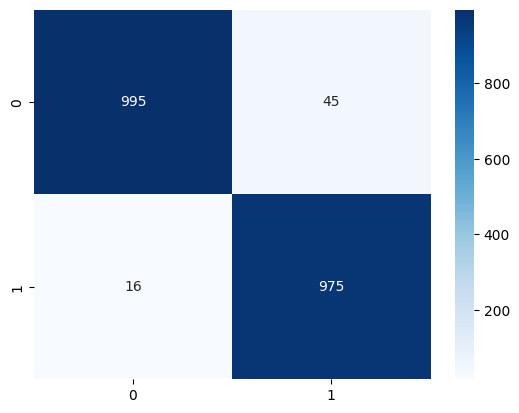

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

**With RBF kernel**

In [53]:
clf1 = svm.SVC(kernel='rbf', class_weight='balanced')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.999015263417036

'precision = [0.99808061 1.        ]'

'recall = [1.         0.99798184]'

'f-score = [0.99903939 0.9989899 ]'

<Axes: >

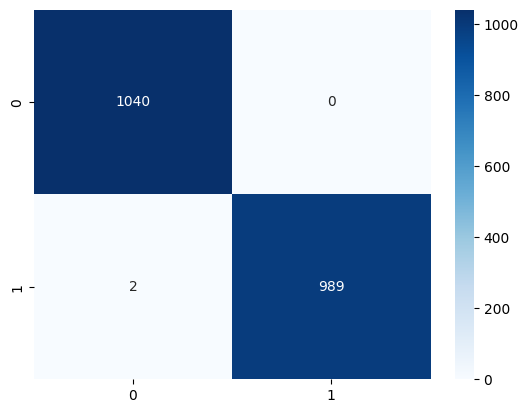

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

**With poly kernel**

In [55]:
clf2 = svm.SVC(kernel='poly', class_weight='balanced')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9980305268340719

'precision = [0.99712092 0.99898888]'

'recall = [0.99903846 0.99697275]'

'f-score = [0.99807877 0.9979798 ]'

<Axes: >

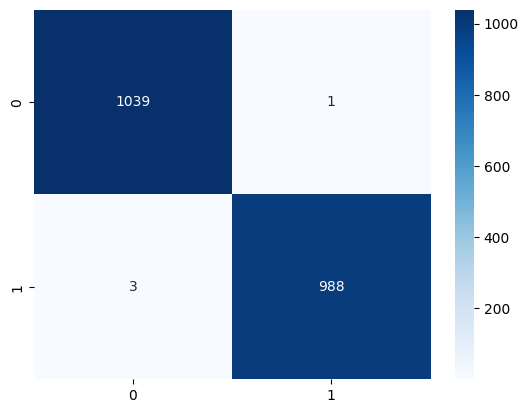

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')